# Univariate ARIMA Prediction - single asset
## 1. Load libraries

In [6]:
#import libraries
import pandas as pd
from pandas import DataFrame 
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.pylab import rcParams
%matplotlib inline

#import itertools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import numpy as np
from numpy import log

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

import time

import seaborn as sns
plt.style.use('seaborn-darkgrid')
import warnings 
warnings.filterwarnings('ignore')

## 2. Load and visualize time series dataset
### 2.1 Load data
Asset data of weekly frequency named xxx.csv is downloaded from Yahoo Finance is loaded into the notebook by the def GetData function. The loaded data is presented as a float32 datatype in a DataFrame format.

In [4]:
%store -r data_EFA
%store -r data_LQD
%store -r data_MUB
%store -r data_XLE



## 3. Data Preprocessing
1. Autocorrelation visualization
2. Stationarity checks
2. Scale data if needs be
3. Trend removal

### 3.1 Auto correlation checks

Text(0.5, 1.0, 'XLE Autocorrelation Plot')

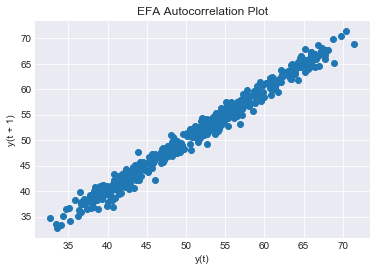

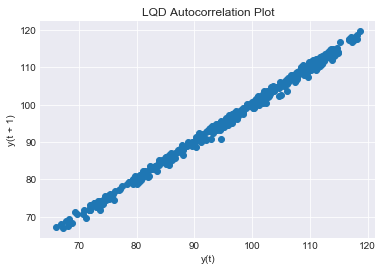

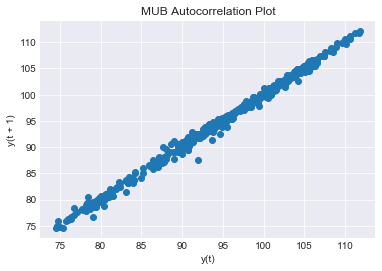

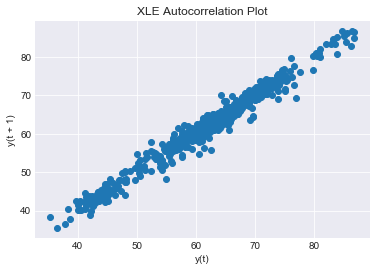

In [7]:
plt.figure()
lag_plot(data_EFA, lag=1)
plt.title('EFA Autocorrelation Plot')

plt.figure()
lag_plot(data_LQD, lag=1)
plt.title('LQD Autocorrelation Plot')

plt.figure()
lag_plot(data_MUB, lag=1)
plt.title('MUB Autocorrelation Plot')

plt.figure()
lag_plot(data_XLE, lag=1)
plt.title('XLE Autocorrelation Plot')

### 3.2 Stationarity checks


In [17]:
#Perform rolling statistics & Dickey-Fuller test:

def stationarity_test(timeseries):
    
    rolling_mean = timeseries.rolling(52).mean()
    rolling_std = timeseries.rolling(52).std()    
    
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [22]:
print('Test for EFA:')
stationarity_test(data_EFA.iloc[:,0])
print ('-'*40)
print('Test for LQD:')
stationarity_test(data_LQD.iloc[:,0])
print ('-'*40)
print('Test for MUB:')
stationarity_test(data_MUB.iloc[:,0])
print ('-'*40)
print('Test for XLE:')
stationarity_test(data_XLE.iloc[:,0])

Test for EFA:
Results of Dickey-Fuller Test:
Test Statistic                  -1.717072
p-value                          0.422338
#Lags Used                       1.000000
Number of Observations Used    520.000000
Critical Value (1%)             -3.442988
Critical Value (5%)             -2.867114
Critical Value (10%)            -2.569739
dtype: float64
----------------------------------------
Test for LQD:
Results of Dickey-Fuller Test:
Test Statistic                  -1.549462
p-value                          0.508917
#Lags Used                       1.000000
Number of Observations Used    520.000000
Critical Value (1%)             -3.442988
Critical Value (5%)             -2.867114
Critical Value (10%)            -2.569739
dtype: float64
----------------------------------------
Test for MUB:
Results of Dickey-Fuller Test:
Test Statistic                  -1.136299
p-value                          0.700382
#Lags Used                       3.000000
Number of Observations Used    518.0000

### Apply first differencing (removal of trends and seasonalities). The "I" term
First differencing allows the computation of differences between t and t-1.

In [58]:
EFA_first_diff = data_EFA - data_EFA.shift(1)
LQD_first_diff = data_LQD - data_LQD.shift(1)
MUB_first_diff = data_MUB - data_MUB.shift(1)
XLE_first_diff = data_XLE - data_XLE.shift(1)

## Building ARIMA(p,d,q) model 
Find optimal p,d,q parameters to build the ARIMA model.

### Plot ACF PACF
To determine the values for p, d, q

Text(0.5, 0.98, 'ACF and PACF for XLE')

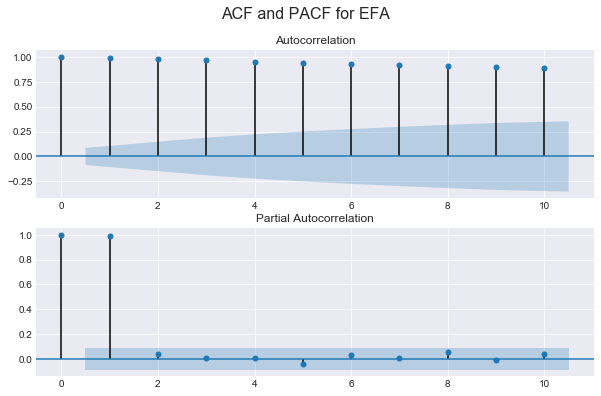

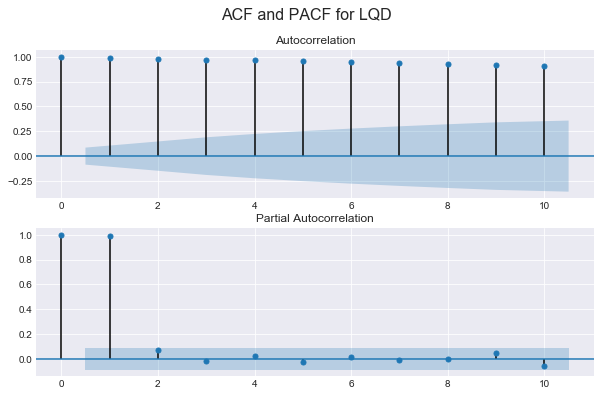

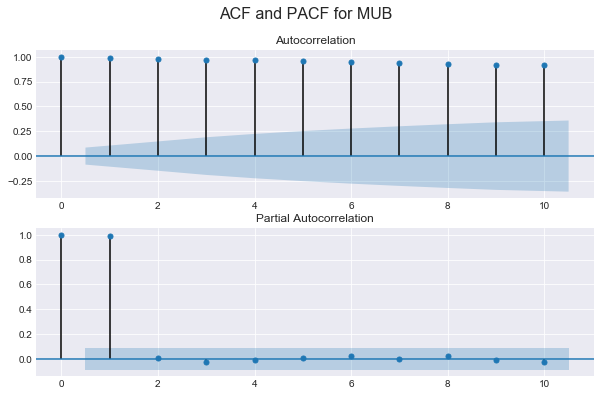

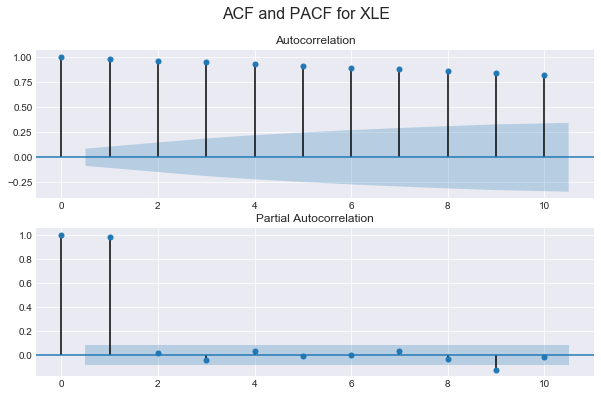

In [64]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_EFA, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_EFA, lags=10, ax=ax2)
fig.suptitle('ACF and PACF for EFA', fontsize = 16)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_LQD, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_LQD, lags=10, ax=ax2)
fig.suptitle('ACF and PACF for LQD', fontsize = 16)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_MUB, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_MUB, lags=10, ax=ax2)
fig.suptitle('ACF and PACF for MUB', fontsize = 16)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_XLE, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_XLE, lags=10, ax=ax2)
fig.suptitle('ACF and PACF for XLE', fontsize = 16)


